In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/DATA')

from zipfile import ZipFile
with ZipFile('/content/DATA/MyDrive/Colab Notebooks/Shape.zip', 'r') as zipobj:
    zipobj.extractall('/content/dataset') #extract train images

# Set the path to the dataset
extract_path = '/content/dataset/'

Mounted at /content/DATA


In [ ]:
import os
import random
import shutil

# Define the paths to the source (Cat) folder
cat_folder = "/content/dataset/Class1"
train_folder = "/content/dataset/training/Class1"
test_folder = "/content/dataset/testing/Class1"

# Ensure the destination folders exist, create them if they don't
if not os.path.exists(train_folder):
    os.makedirs(train_folder)
if not os.path.exists(test_folder):
    os.makedirs(test_folder)

# Get a list of all image files in the Cat folder
image_files = [f for f in os.listdir(cat_folder) if f.endswith(".jpg") or f.endswith(".png")]

# Shuffle the list of image files randomly
random.shuffle(image_files)

# Calculate the split point based on an 80-20 split
split_point = int(0.8 * len(image_files))

# Split the images into training and testing sets
train_images = image_files[:split_point]
test_images = image_files[split_point:]

# Move training images to the Train folder
for image in train_images:
    source_path = os.path.join(cat_folder, image)
    destination_path = os.path.join(train_folder, image)
    shutil.move(source_path, destination_path)

# Move testing images to the Test folder
for image in test_images:
    source_path = os.path.join(cat_folder, image)
    destination_path = os.path.join(test_folder, image)
    shutil.move(source_path, destination_path)

print(f"Split {len(train_images)} images for training and {len(test_images)} images for testing.")


Split 400 images for training and 100 images for testing.


In [ ]:
cat_folder = "/content/dataset/Class2"
train_folder = "/content/dataset/training/Class2"
test_folder = "/content/dataset/testing/Class2"


# Ensure the destination folders exist, create them if they don't
if not os.path.exists(train_folder):
    os.makedirs(train_folder)
if not os.path.exists(test_folder):
    os.makedirs(test_folder)

# Get a list of all image files in the Cat folder
image_files = [f for f in os.listdir(cat_folder) if f.endswith(".jpg") or f.endswith(".png")]

# Shuffle the list of image files randomly
random.shuffle(image_files)

# Calculate the split point based on an 80-20 split
split_point = int(0.8 * len(image_files))

# Split the images into training and testing sets
train_images = image_files[:split_point]
test_images = image_files[split_point:]

# Move training images to the Train folder
for image in train_images:
    source_path = os.path.join(cat_folder, image)
    destination_path = os.path.join(train_folder, image)
    shutil.move(source_path, destination_path)

# Move testing images to the Test folder
for image in test_images:
    source_path = os.path.join(cat_folder, image)
    destination_path = os.path.join(test_folder, image)
    shutil.move(source_path, destination_path)

print(f"Split {len(train_images)} images for training and {len(test_images)} images for testing.")


Split 400 images for training and 100 images for testing.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Define the transform to preprocess the images
transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((50, 50)),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.expand(3, -1, -1)),  # Expand dimensions to have 3 channels
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


In [ ]:
import os

# Specify the path to the directory
directory_path = '/content/dataset/training/.ipynb_checkpoints'

# Check if the directory exists before attempting to delete it
if os.path.exists(directory_path):
    # Delete the directory and its contents
    os.rmdir(directory_path)
    print(f"Deleted {directory_path}")
else:
    print(f"{directory_path} does not exist.")


/content/dataset/training/.ipynb_checkpoints does not exist.


In [ ]:
import os
# Load the training dataset
train_dataset = torchvision.datasets.ImageFolder(
    root='/content/dataset/training',
    transform=transform
)

# Split the dataset into training and validation sets
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])


In [ ]:
import os

# Specify the path to the directory
directory_path = '/content/dataset/testing/.ipynb_checkpoints'

# Check if the directory exists before attempting to delete it
if os.path.exists(directory_path):
    # Delete the directory and its contents
    os.rmdir(directory_path)
    print(f"Deleted {directory_path}")
else:
    print(f"{directory_path} does not exist.")


/content/dataset/testing/.ipynb_checkpoints does not exist.


In [ ]:
def MyModel(BT_size=32):
    LR_RATE=0.0015

    No_Epoch=30
    DR_Rate=0.25
    import torch
    from numpy.ma.core import append
    # Create data loaders for training and validation
    train_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=BT_size,
        shuffle=True,
        num_workers=2
    )

    val_loader = torch.utils.data.DataLoader(
        val_dataset,
        batch_size=BT_size,
        shuffle=True,
        num_workers=2
    )

    # Load the testing dataset
    test_dataset = torchvision.datasets.ImageFolder(
        root=os.path.join(extract_path, 'testing'),
        transform=transform
    )

    test_loader = torch.utils.data.DataLoader(
        test_dataset,
        batch_size=BT_size,
        shuffle=True,
        num_workers=2
    )


    import torch
    import torch.nn as nn

    class CNN(nn.Module):
        def __init__(self):
            super(CNN, self).__init__()
            self.conv1 = nn.Conv2d(3, 20, kernel_size=3, stride=1, padding=1)
            self.relu1 = nn.ReLU()
            self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

            self.conv2 = nn.Conv2d(20, 50, kernel_size=3, stride=1, padding=1)
            self.relu2 = nn.ReLU()
            self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

            self.conv3 = nn.Conv2d(50, 25, kernel_size=3, stride=1, padding=1)
            self.relu3 = nn.ReLU()
            self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
            self.dropout = nn.Dropout(DR_Rate)

            self.fc1 = nn.Linear(25 * 6 * 6 , 10)
            self.relu3 = nn.ReLU()
            self.fc2 = nn.Linear(10, 2)

        def forward(self, x):
            x = self.conv1(x)
            x = self.relu1(x)
            x = self.pool1(x)

            x = self.conv2(x)
            x = self.relu2(x)
            x = self.pool2(x)

            x = self.conv3(x)
            x = self.relu3(x)
            x = self.pool3(x)



            x = x.view(-1, 25 * 6 * 6)
            x = self.fc1(x)
            x = self.relu3(x)
            x = self.fc2(x)
            return x

    model = CNN()

    import matplotlib.pyplot as plt

    # Initialize empty lists to store loss and accuracy values
    train_loss_values = []
    train_accuracy_values = []

    # Define the loss function and optimizer



    # Create a FocalLoss object
    criterion = nn.CrossEntropyLoss()


    optimizer = optim.Adam(model.parameters(), lr=LR_RATE)

    # Train the model

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # Training loop
    num_epochs = No_Epoch
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_predictions = 0
        total_predictions = 0

        for images, labels in train_loader:
            # ... (rest of the training code)
            images = images.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            # Calculate accuracy
            _, predicted_labels = torch.max(outputs.data, 1)
            total_predictions += labels.size(0)
            correct_predictions += (predicted_labels == labels).sum().item()

            running_loss += loss.item()

        # Calculate average loss and accuracy for the epoch
        average_loss = running_loss / len(train_loader)
        accuracy = correct_predictions / total_predictions

        # Append loss and accuracy values to the lists
        train_loss_values.append(average_loss)
        train_accuracy_values.append(accuracy)

        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {average_loss}, Accuracy: {accuracy}")

    """
    # Plotting the loss curve
    plt.plot(range(1, num_epochs + 1), train_loss_values)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Curve')
    plt.show()

    # Plotting the accuracy curve
    plt.plot(range(1, num_epochs + 1), train_accuracy_values)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy Curve')
    plt.show()
    """
    return train_accuracy_values, train_loss_values, num_epochs

Accuracy = []
Loss = []
train_loss = []
train_accuracy  = []
epoch = 0
loop_calling = 28

LearningRate = [0.0005, 0.00055, 0.00060, 0.00065, 0.0007, 0.0075,  0.0008, 0.0009, 0.001, 0.002]
BatchSize = [4  , 4  , 4  , 4  ,8  , 8  , 8  , 8  ,16  , 16  , 16  , 16  ,32  , 32  , 32  , 32  ,64  , 64  , 64  , 64  ,128  , 128  , 128  , 128  ,256  , 256  , 256  , 256 ]
DropoutRate = [0.15, 0.20, 0.25, 0.30, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65]
No_of_Epoch = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55]
KernelSize = [2,3,4,5,6,7,8,9,10]
StrideValue = []
PaddingValue = []

for trial in range(loop_calling):
    if trial<loop_calling:
        print("Model Training Sequence: ",trial+1)
        # LearningRate[trial], BatchSize[trial], DropoutRate[trial], No_of_Epoch[trial]

        print("When Batch Size: ",BatchSize[trial])
        train_accuracy, train_loss, epoch = MyModel(BatchSize[trial])
        Accuracy.append(train_accuracy)
        Loss.append(train_loss)
        print("\n\n")



Model Training Sequence:  1
When Batch Size:  4
Epoch 1/30, Loss: 1.3884468123316764, Accuracy: 0.5109375
Epoch 2/30, Loss: 1.3875193849205971, Accuracy: 0.521875
Epoch 3/30, Loss: 1.3892074957489968, Accuracy: 0.496875
Epoch 4/30, Loss: 1.3882240422070027, Accuracy: 0.5
Epoch 5/30, Loss: 1.3869279868900777, Accuracy: 0.50625
Epoch 6/30, Loss: 1.3867755234241486, Accuracy: 0.50625
Epoch 7/30, Loss: 1.3867964334785938, Accuracy: 0.50625
Epoch 8/30, Loss: 1.3872663594782353, Accuracy: 0.50625
Epoch 9/30, Loss: 1.3866042971611023, Accuracy: 0.50625
Epoch 10/30, Loss: 1.3867992736399173, Accuracy: 0.50625
Epoch 11/30, Loss: 1.3866964899003507, Accuracy: 0.496875
Epoch 12/30, Loss: 1.3865988619625569, Accuracy: 0.50625
Epoch 13/30, Loss: 1.386955413222313, Accuracy: 0.490625
Epoch 14/30, Loss: 1.386650701612234, Accuracy: 0.50625
Epoch 15/30, Loss: 1.3869192183017731, Accuracy: 0.5
Epoch 16/30, Loss: 1.386493694037199, Accuracy: 0.50625
Epoch 17/30, Loss: 1.3866051480174064, Accuracy: 0.506

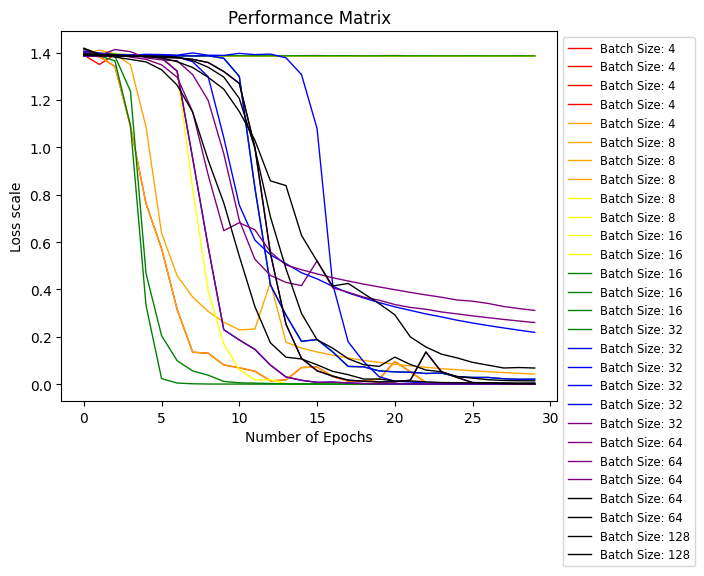

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
Accuracy = np.array(Accuracy)
Accuracy = Accuracy.reshape(loop_calling, epoch)

Loss = np.array(Loss)
Loss = Loss.reshape(28, epoch)

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Iterate over the rows of the matrix and plot each row as a curve
colors = ["red", "orange", "yellow", "green", "blue", "purple", "black", "cyan", "magenta", "gray"]
for i in range(7):
    for j in range(4):
    #ax.plot(Accuracy[i], color=colors[i], label=f"Accuracy {i+1}", linewidth=0.6)
        ax.plot(Loss[i*3+j], color=colors[i], label=f"Batch Size: {BatchSize[i*3+j]}", linewidth=0.99)

# Set the labels and title for the plot
ax.set_xlabel("Number of Epochs")
ax.set_ylabel("Loss scale")
ax.set_title("Performance Matrix")


# Display the plot
plt.legend(bbox_to_anchor=(1, 1), fontsize=8.3)
plt.show()

In [ ]:
 # Save the model
torch.save(model.state_dict(), 'mnist_model.pth')

# Load the model
model = CNN()
model.load_state_dict(torch.load('mnist_model.pth'))
model.to(device)

from PIL import Image
# Load and preprocess the image
image_path = '/content/dataset/testing/Class2/img_105.png'
image = Image.open(image_path).convert('L').resize((50, 50))
image = transform(image).unsqueeze(0).to(device)

# Make a prediction
model.eval()
with torch.no_grad():
    output = model(image)
    predicted_class = torch.argmax(output).item()
    if predicted_class == 0:
        predicted_class = "Circle"
    else:
        predicted_class = "Rectangle"

print("Predicted class:", predicted_class)

from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def print_image(image_path):
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

print_image(image_path)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate a random 10x10 matrix of float values
matrix = np.random.rand(10, 10)

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Iterate over the rows of the matrix and plot each row as a curve
colors = ["red", "orange", "yellow", "green", "blue", "purple", "black", "cyan", "magenta", "gray"]
for i in range(10):
    ax.plot(matrix[i], color=colors[i], label=f"Curve {i+1}", linewidth=0.4)

# Set the labels and title for the plot
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Accuracy Matrix")


# Display the plot
plt.legend(bbox_to_anchor=(1, 1), fontsize=10)
plt.show()